In [1]:
%matplotlib inline

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

# Data Tidying and Cleaning
## Live Demos

In [3]:
pew_data = pd.read_csv("data/pew.csv")

In [4]:
pew_data

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [12]:
pew_data_tidy = pd.melt(pew_data, id_vars = ["religion"], var_name = "income", value_name = "frequency")

In [13]:
pew_data_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [14]:
tb_data = pd.read_csv("data/tb.csv")

tb_data

In [16]:
tb_data.columns

Index(['iso2', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [19]:
tb_data_unpivoted = tb_data.melt(id_vars = ["iso2", "year"], var_name = "gender_and_age", value_name = "frequency")

In [20]:
tb_data_unpivoted

,iso2,year,gender_and_age,frequency
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [26]:
gender = tb_data_unpivoted.gender_and_age.str.slice(0, 1)

In [27]:
age_range = tb_data_unpivoted.gender_and_age.str.slice(1)

In [30]:
tb_data_unpivoted["gender"] = gender

In [32]:
tb_data_unpivoted["age_range"] = age_range

In [39]:
tb_data_tidy = tb_data_unpivoted.drop(["gender_and_age"], axis = 1)

In [50]:
del tb_data_unpivoted

In [52]:
tb_data_tidy

,iso2,year,gender,age_range,frequency
0,AD,1989,m,04,NaN
1,AD,1990,m,04,NaN
2,AD,1991,m,04,NaN
3,AD,1992,m,04,NaN
4,AD,1993,m,04,NaN
...,...,...,...,...,...
115375,ZW,2004,f,u,NaN
115376,ZW,2005,f,u,NaN
115377,ZW,2006,f,u,NaN
115378,ZW,2007,f,u,NaN


In [53]:
tb_data_tidy = tb_data_tidy[["iso2", "year", "gender", "age_range", "frequency"]]

In [54]:
tb_data_tidy

,iso2,year,gender,age_range,frequency
0,AD,1989,m,04,NaN
1,AD,1990,m,04,NaN
2,AD,1991,m,04,NaN
3,AD,1992,m,04,NaN
4,AD,1993,m,04,NaN
...,...,...,...,...,...
115375,ZW,2004,f,u,NaN
115376,ZW,2005,f,u,NaN
115377,ZW,2006,f,u,NaN
115378,ZW,2007,f,u,NaN


In [64]:
age_ranges = tb_data_tidy.age_range.str.extract("(\d+)(\d{2})").sample(30)

In [69]:
tb_data_tidy["age_lower"] = age_ranges.loc[:, 0]
tb_data_tidy["age_upper"] = age_ranges.loc[:, 1]

In [71]:
tb_data_tidy = tb_data_tidy.drop(["age_range"], axis = 1)

In [73]:
tb_data_tidy = tb_data_tidy[["iso2", "year", "gender", "age_lower", "age_upper", "frequency"]]

In [78]:
tb_data_tidy

,iso2,year,gender,age_lower,age_upper,frequency
0,AD,1989,m,NaN,NaN,NaN
1,AD,1990,m,NaN,NaN,NaN
2,AD,1991,m,NaN,NaN,NaN
3,AD,1992,m,NaN,NaN,NaN
4,AD,1993,m,NaN,NaN,NaN
...,...,...,...,...,...,...
115375,ZW,2004,f,NaN,NaN,NaN
115376,ZW,2005,f,NaN,NaN,NaN
115377,ZW,2006,f,NaN,NaN,NaN
115378,ZW,2007,f,NaN,NaN,NaN


In [79]:
weather_data = pd.read_csv("data/weather.csv")

In [80]:
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [82]:
weather_data_unpivoted = pd.melt(weather_data, id_vars = ["id", "year", "month", "element"])

In [85]:
days = weather_data_unpivoted.variable.str.slice(1)

In [87]:
days = days.astype(int)

In [91]:
weather_data_unpivoted["day"] = days
weather_data_unpivoted = weather_data_unpivoted.drop(["variable"], axis = 1)

In [94]:
weather_data_unpivoted[weather_data_unpivoted.month == 2]

,id,year,month,element,value,day
2,MX17004,2010,2,tmax,NaN,1
3,MX17004,2010,2,tmin,NaN,1
24,MX17004,2010,2,tmax,27.3,2
25,MX17004,2010,2,tmin,14.4,2
46,MX17004,2010,2,tmax,24.1,3
...,...,...,...,...,...,...
619,MX17004,2010,2,tmin,NaN,29
640,MX17004,2010,2,tmax,NaN,30
641,MX17004,2010,2,tmin,NaN,30
662,MX17004,2010,2,tmax,NaN,31


In [99]:
weather_data_tidy = weather_data_unpivoted.pivot_table(index = ["id", "year", "month", "day"], columns = ["element"], values = ["value"])

In [100]:
weather_data_tidy

value      
element                 tmax  tmin
id      year month day            
MX17004 2010 1     30   27.8  14.5
             2     2    27.3  14.4
                   3    24.1  14.4
                   11   29.7  13.4
                   23   29.9  10.7
             3     5    32.1  14.2
                   10   34.5  16.8
                   16   31.1  17.6
             4     27   36.3  16.7
             5     27   33.2  18.2
             6     17   28.0  17.5
                   29   30.1  18.0
             7     3    28.6  17.5
                   14   29.9  16.5
             8     23   26.4  15.0
                   5    29.6  15.8
                   29   28.0  15.3
                   8    29.0  17.3
                   13   29.8  16.5
                   25   29.7  15.6
                   31   25.4  15.4
             10    5    27.0  14.0
                   14   29.5  13.0
                   7    28.1  12.9
                   15   28.7  10.5
                   28   31.2  15.0
             11    2    31.3  16.3
                   5    26.3   7.9
                   27   27.7  14.2
                   4    27.2  12.0
                   26   28.1  12.1
             12    1    29.9  13.8
                   6    27.8  10.5

In [103]:
weather_data_tidy = weather_data_tidy.reset_index()

In [108]:
weather_data_tidy

id  year month day value      
element                           tmax  tmin
0        MX17004  2010     1  30  27.8  14.5
1        MX17004  2010     2   2  27.3  14.4
2        MX17004  2010     2   3  24.1  14.4
3        MX17004  2010     2  11  29.7  13.4
4        MX17004  2010     2  23  29.9  10.7
5        MX17004  2010     3   5  32.1  14.2
6        MX17004  2010     3  10  34.5  16.8
7        MX17004  2010     3  16  31.1  17.6
8        MX17004  2010     4  27  36.3  16.7
9        MX17004  2010     5  27  33.2  18.2
10       MX17004  2010     6  17  28.0  17.5
11       MX17004  2010     6  29  30.1  18.0
12       MX17004  2010     7   3  28.6  17.5
13       MX17004  2010     7  14  29.9  16.5
14       MX17004  2010     8  23  26.4  15.0
15       MX17004  2010     8   5  29.6  15.8
16       MX17004  2010     8  29  28.0  15.3
17       MX17004  2010     8   8  29.0  17.3
18       MX17004  2010     8  13  29.8  16.5
19       MX17004  2010     8  25  29.7  15.6
20       MX17004  2010     8  31  25.4  15.4
21       MX17004  2010    10   5  27.0  14.0
22       MX17004  2010    10  14  29.5  13.0
23       MX17004  2010    10   7  28.1  12.9
24       MX17004  2010    10  15  28.7  10.5
25       MX17004  2010    10  28  31.2  15.0
26       MX17004  2010    11   2  31.3  16.3
27       MX17004  2010    11   5  26.3   7.9
28       MX17004  2010    11  27  27.7  14.2
29       MX17004  2010    11   4  27.2  12.0
30       MX17004  2010    11  26  28.1  12.1
31       MX17004  2010    12   1  29.9  13.8
32       MX17004  2010    12   6  27.8  10.5

In [110]:
billboard_data = pd.read_csv("data/billboard.csv")

In [111]:
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
billboard_data_tidy = billboard_data.melt(id_vars = ["year", "artist", "track", "time", "date.entered"])

In [127]:
billboard_data_tidy["week"] = billboard_data_tidy.variable.str.slice(2).astype(int)

In [128]:
billboard_data_tidy = billboard_data_tidy.drop(["variable"], axis = 1)

In [129]:
billboard_data_tidy

,year,artist,track,time,date.entered,value,week
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87.0,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91.0,1
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81.0,1
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76.0,1
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57.0,1
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,NaN,76
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,NaN,76
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,NaN,76
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,NaN,76


In [130]:
billboard_data_tidy = billboard_data_tidy.dropna()

In [131]:
billboard_data_tidy

,year,artist,track,time,date.entered,value,week
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87.0,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91.0,1
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81.0,1
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76.0,1
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57.0,1
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,50.0,63
19833,2000,Lonestar,Amazed,4:25,1999-06-05,45.0,63
20033,2000,Creed,Higher,5:16,1999-09-11,50.0,64
20150,2000,Lonestar,Amazed,4:25,1999-06-05,50.0,64


In [132]:
billboard_data_tidy.value = billboard_data_tidy.value.astype(int)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [134]:
billboard_data_tidy

,year,artist,track,time,date.entered,value,week
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,1
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,1
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,1
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,1
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,50,63
19833,2000,Lonestar,Amazed,4:25,1999-06-05,45,63
20033,2000,Creed,Higher,5:16,1999-09-11,50,64
20150,2000,Lonestar,Amazed,4:25,1999-06-05,50,64


In [135]:
billboard_data_tidy[["year", "artist", "track", "time"]]

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35
...,...,...,...,...
19716,2000,Creed,Higher,5:16
19833,2000,Lonestar,Amazed,4:25
20033,2000,Creed,Higher,5:16
20150,2000,Lonestar,Amazed,4:25


In [136]:
billboard_data_tidy[["date.entered", "week", "value"]]

,date.entered,week,value
0,2000-02-26,1,87
1,2000-09-02,1,91
2,2000-04-08,1,81
3,2000-10-21,1,76
4,2000-04-15,1,57
...,...,...,...
19716,1999-09-11,63,50
19833,1999-06-05,63,45
20033,1999-09-11,64,50
20150,1999-06-05,64,50


In [141]:
billboard_data_tidy.tail(10)

,year,artist,track,time,date.entered,value,week
18882,2000,Lonestar,Amazed,4:25,1999-06-05,37,60
19082,2000,Creed,Higher,5:16,1999-09-11,43,61
19199,2000,Lonestar,Amazed,4:25,1999-06-05,42,61
19399,2000,Creed,Higher,5:16,1999-09-11,47,62
19516,2000,Lonestar,Amazed,4:25,1999-06-05,42,62
19716,2000,Creed,Higher,5:16,1999-09-11,50,63
19833,2000,Lonestar,Amazed,4:25,1999-06-05,45,63
20033,2000,Creed,Higher,5:16,1999-09-11,50,64
20150,2000,Lonestar,Amazed,4:25,1999-06-05,50,64
20350,2000,Creed,Higher,5:16,1999-09-11,49,65


In [149]:
billboard_data_tidy.sample(10)

,year,artist,track,time,date.entered,value,week
1070,2000,"Henley, Don",Taking You Home,4:08,2000-06-24,73,4
4091,2000,"Thomas, Carl",Emotional,4:31,2000-11-25,69,13
8001,2000,Destiny's Child,Say My Name,4:31,1999-12-25,18,26
3766,2000,"Strait, George",Go On,3:48,2000-08-26,46,12
2709,2000,Lil' Kim,No Matter What They ...,4:12,2000-07-15,90,9
6271,2000,"Rimes, LeAnn",I Need You,3:42,2000-05-27,21,20
1865,2000,"Strait, George",The Best Day,3:24,2000-01-29,44,6
341,2000,"Backstreet Boys, The",Show Me The Meaning ...,3:54,2000-01-01,62,2
4095,2000,Train,Meet Virginia,3:55,1999-10-09,21,13
1452,2000,Lox,"Ryde or Die, Chick",3:56,2000-03-18,91,5


In [150]:
weather_data_tidy

id  year month day value      
element                           tmax  tmin
0        MX17004  2010     1  30  27.8  14.5
1        MX17004  2010     2   2  27.3  14.4
2        MX17004  2010     2   3  24.1  14.4
3        MX17004  2010     2  11  29.7  13.4
4        MX17004  2010     2  23  29.9  10.7
5        MX17004  2010     3   5  32.1  14.2
6        MX17004  2010     3  10  34.5  16.8
7        MX17004  2010     3  16  31.1  17.6
8        MX17004  2010     4  27  36.3  16.7
9        MX17004  2010     5  27  33.2  18.2
10       MX17004  2010     6  17  28.0  17.5
11       MX17004  2010     6  29  30.1  18.0
12       MX17004  2010     7   3  28.6  17.5
13       MX17004  2010     7  14  29.9  16.5
14       MX17004  2010     8  23  26.4  15.0
15       MX17004  2010     8   5  29.6  15.8
16       MX17004  2010     8  29  28.0  15.3
17       MX17004  2010     8   8  29.0  17.3
18       MX17004  2010     8  13  29.8  16.5
19       MX17004  2010     8  25  29.7  15.6
20       MX17004  2010     8  31  25.4  15.4
21       MX17004  2010    10   5  27.0  14.0
22       MX17004  2010    10  14  29.5  13.0
23       MX17004  2010    10   7  28.1  12.9
24       MX17004  2010    10  15  28.7  10.5
25       MX17004  2010    10  28  31.2  15.0
26       MX17004  2010    11   2  31.3  16.3
27       MX17004  2010    11   5  26.3   7.9
28       MX17004  2010    11  27  27.7  14.2
29       MX17004  2010    11   4  27.2  12.0
30       MX17004  2010    11  26  28.1  12.1
31       MX17004  2010    12   1  29.9  13.8
32       MX17004  2010    12   6  27.8  10.5

In [151]:
weather_data_tidy.columns

MultiIndex([(   'id',     ''),
            ( 'year',     ''),
            ('month',     ''),
            (  'day',     ''),
            ('value', 'tmax'),
            ('value', 'tmin')],
           names=[None, 'element'])

In [155]:
weather_data_tidy[("value", "tmax")].nlargest(10)

8     36.3
6     34.5
9     33.2
5     32.1
26    31.3
25    31.2
7     31.1
11    30.1
4     29.9
13    29.9
Name: (value, tmax), dtype: float64

In [158]:
weather_data_tidy.nlargest(10, ("value", "tmax"))

id  year month day value      
element                           tmax  tmin
8        MX17004  2010     4  27  36.3  16.7
6        MX17004  2010     3  10  34.5  16.8
9        MX17004  2010     5  27  33.2  18.2
5        MX17004  2010     3   5  32.1  14.2
26       MX17004  2010    11   2  31.3  16.3
25       MX17004  2010    10  28  31.2  15.0
7        MX17004  2010     3  16  31.1  17.6
11       MX17004  2010     6  29  30.1  18.0
4        MX17004  2010     2  23  29.9  10.7
13       MX17004  2010     7  14  29.9  16.5

In [159]:
weather_data_tidy

id  year month day value      
element                           tmax  tmin
0        MX17004  2010     1  30  27.8  14.5
1        MX17004  2010     2   2  27.3  14.4
2        MX17004  2010     2   3  24.1  14.4
3        MX17004  2010     2  11  29.7  13.4
4        MX17004  2010     2  23  29.9  10.7
5        MX17004  2010     3   5  32.1  14.2
6        MX17004  2010     3  10  34.5  16.8
7        MX17004  2010     3  16  31.1  17.6
8        MX17004  2010     4  27  36.3  16.7
9        MX17004  2010     5  27  33.2  18.2
10       MX17004  2010     6  17  28.0  17.5
11       MX17004  2010     6  29  30.1  18.0
12       MX17004  2010     7   3  28.6  17.5
13       MX17004  2010     7  14  29.9  16.5
14       MX17004  2010     8  23  26.4  15.0
15       MX17004  2010     8   5  29.6  15.8
16       MX17004  2010     8  29  28.0  15.3
17       MX17004  2010     8   8  29.0  17.3
18       MX17004  2010     8  13  29.8  16.5
19       MX17004  2010     8  25  29.7  15.6
20       MX17004  2010     8  31  25.4  15.4
21       MX17004  2010    10   5  27.0  14.0
22       MX17004  2010    10  14  29.5  13.0
23       MX17004  2010    10   7  28.1  12.9
24       MX17004  2010    10  15  28.7  10.5
25       MX17004  2010    10  28  31.2  15.0
26       MX17004  2010    11   2  31.3  16.3
27       MX17004  2010    11   5  26.3   7.9
28       MX17004  2010    11  27  27.7  14.2
29       MX17004  2010    11   4  27.2  12.0
30       MX17004  2010    11  26  28.1  12.1
31       MX17004  2010    12   1  29.9  13.8
32       MX17004  2010    12   6  27.8  10.5

We need to oversample 300 observations (with replacement).

In [165]:
weather_data_tidy.sample(300, replace = True)

id  year month day value      
element                           tmax  tmin
7        MX17004  2010     3  16  31.1  17.6
21       MX17004  2010    10   5  27.0  14.0
23       MX17004  2010    10   7  28.1  12.9
22       MX17004  2010    10  14  29.5  13.0
26       MX17004  2010    11   2  31.3  16.3
..           ...   ...   ...  ..   ...   ...
15       MX17004  2010     8   5  29.6  15.8
11       MX17004  2010     6  29  30.1  18.0
21       MX17004  2010    10   5  27.0  14.0
7        MX17004  2010     3  16  31.1  17.6
30       MX17004  2010    11  26  28.1  12.1

[300 rows x 6 columns]

In [170]:
billboard_data_tidy[["artist", "date.entered"]]

,artist,date.entered
0,2 Pac,2000-02-26
1,2Ge+her,2000-09-02
2,3 Doors Down,2000-04-08
3,3 Doors Down,2000-10-21
4,504 Boyz,2000-04-15
...,...,...
19716,Creed,1999-09-11
19833,Lonestar,1999-06-05
20033,Creed,1999-09-11
20150,Lonestar,1999-06-05


In [174]:
billboard_data_tidy["date.entered"]

0        2000-02-26
1        2000-09-02
2        2000-04-08
3        2000-10-21
4        2000-04-15
            ...    
19716    1999-09-11
19833    1999-06-05
20033    1999-09-11
20150    1999-06-05
20350    1999-09-11
Name: date.entered, Length: 5307, dtype: object

In [175]:
billboard_data_tidy[["date.entered"]]

,date.entered
0,2000-02-26
1,2000-09-02
2,2000-04-08
3,2000-10-21
4,2000-04-15
...,...
19716,1999-09-11
19833,1999-06-05
20033,1999-09-11
20150,1999-06-05


In [178]:
tdd_filter = billboard_data_tidy["artist"] == "3 Doors Down"

In [182]:
billboard_data_tidy[tdd_filter]["track"]

2        Kryptonite
3             Loser
319      Kryptonite
320           Loser
636      Kryptonite
            ...    
15218    Kryptonite
15535    Kryptonite
15852    Kryptonite
16169    Kryptonite
16486    Kryptonite
Name: track, Length: 73, dtype: object

In [188]:
tdd_and_eminem_filter = (billboard_data_tidy["artist"] == "3 Doors Down") | (billboard_data_tidy["artist"] == "Eminem")

In [189]:
billboard_data_tidy[tdd_and_eminem_filter]

,year,artist,track,time,date.entered,value,week
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,1
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,1
92,2000,Eminem,Stan,5:26,2000-11-04,78,1
93,2000,Eminem,The Real Slim Shady,4:42,2000-05-06,70,1
94,2000,Eminem,The Way I Am,4:40,2000-08-26,87,1
...,...,...,...,...,...,...,...
15218,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,28,49
15535,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,33,50
15852,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,42,51
16169,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,42,52


In [191]:
billboard_data_tidy[billboard_data_tidy["artist"] != "Eminem"].artist.unique()

array(['2 Pac', '2Ge+her', '3 Doors Down', '504 Boyz', '98^0', 'A*Teens',
       'Aaliyah', 'Adams, Yolanda', 'Adkins, Trace',
       'Aguilera, Christina', 'Alice Deejay', 'Allan, Gary', 'Amber',
       'Anastacia', 'Anthony, Marc', 'Avant', 'BBMak',
       'Backstreet Boys, The', 'Badu, Erkyah', 'Baha Men',
       'Barenaked Ladies', 'Beenie Man', 'Before Dark', 'Bega, Lou',
       'Big Punisher', 'Black Rob', 'Black, Clint', 'Blaque',
       'Blige, Mary J.', 'Blink-182', 'Bloodhound Gang', 'Bon Jovi',
       'Braxton, Toni', 'Brock, Chad', 'Brooks & Dunn', 'Brooks, Garth',
       'Byrd, Tracy', 'Cagle, Chris', "Cam'ron", 'Carey, Mariah',
       'Carter, Aaron', 'Carter, Torrey', 'Changing Faces',
       'Chesney, Kenny', 'Clark Family Experience', 'Clark, Terri',
       'Common', 'Counting Crows', 'Creed', 'Cyrus, Billy Ray',
       "D'Angelo", 'DMX', 'Da Brat', 'Davidson, Clay', 'De La Soul',
       "Destiny's Child", 'Diffie, Joe', 'Dion, Celine',
       'Dixie Chicks, The', 'Dr.

In [192]:
(billboard_data_tidy.artist == "Eminem").logical_or()

0        False
1        False
2        False
3        False
4        False
         ...  
19716    False
19833    False
20033    False
20150    False
20350    False
Name: artist, Length: 5307, dtype: bool

In [198]:
weather_data_tidy[("value", "tmax")].mean(), weather_data_tidy[("value", "tmax")].std()

(29.19090909090909, 2.4974191223595756)

In [207]:
for religion, data in pew_data_tidy.groupby("religion"):
    print(religion, data.frequency.sum())

Agnostic 826
Atheist 515
Buddhist 411
Catholic 8054
Don’t know/refused 272
Evangelical Prot 9472
Hindu 257
Historically Black Prot 1995
Jehovah's Witness 215
Jewish 682
Mainline Prot 7470
Mormon 581
Muslim 116
Orthodox 363
Other Christian 129
Other Faiths 449
Other World Religions 42
Unaffiliated 3707


In [208]:
for income, data in pew_data_tidy.groupby("income"):
    print(income, data.frequency.sum())

$10-20k 2781
$100-150k 3197
$20-30k 3357
$30-40k 3302
$40-50k 3085
$50-75k 5185
$75-100k 3990
<$10k 1930
>150k 2608
Don't know/refused 6121


In [232]:
weather_yearly = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [233]:
weather_yearly

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [234]:
weather_yearly.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
    "mean_dew", "min_dew", "max_humidity", "mean_humidity",
    "min_humidity", "max_pressure", "mean_pressure",
    "min_pressure", "max_visibilty", "mean_visibility",
    "min_visibility", "max_wind", "mean_wind", "min_wind",
    "precipitation", "cloud_cover", "events", "wind_dir"]

In [235]:
weather_yearly.head()

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


In [236]:
weather_yearly.shape

(366, 23)

In [237]:
def string_to_date(date_string):
    return datetime.datetime.strptime(date_string, "%Y-%m-%d")

In [238]:
weather_yearly.date = weather_yearly.date.apply(string_to_date)

In [239]:
weather_yearly.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibilty               int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
min_wind                  float64
precipitation              object
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [240]:
weather_yearly.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [241]:
weather_yearly.loc[weather_yearly.precipitation == "T", "precipitation"] = 1e-5

In [245]:
weather_yearly.precipitation = weather_yearly.precipitation.astype(float)

In [248]:
weather_yearly.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibilty               int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
min_wind                  float64
precipitation             float64
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [250]:
weather_yearly.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [253]:
weather_yearly.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,366.0,66.803279,20.361247,16.00,51.00,69.00,84.0000,106.00
mean_temp,366.0,55.683060,18.436506,11.00,41.00,59.00,70.7500,89.00
min_temp,366.0,44.101093,17.301141,1.00,30.00,47.00,57.7500,77.00
max_dew,366.0,49.549180,16.397178,0.00,36.00,54.50,62.0000,77.00
mean_dew,366.0,44.057377,16.829996,-3.00,30.00,48.00,57.0000,72.00
min_dew,366.0,37.980874,17.479449,-5.00,24.00,41.00,51.0000,71.00
max_humidity,366.0,90.027322,9.108438,54.00,85.00,93.00,96.0000,100.00
mean_humidity,366.0,67.860656,9.945591,37.00,61.25,68.00,74.0000,95.00
min_humidity,366.0,45.193989,15.360261,15.00,35.00,42.00,54.0000,90.00
max_pressure,366.0,30.108907,0.172189,29.64,29.99,30.10,30.2100,30.60


In [254]:
weather_yearly[weather_yearly.min_wind.isna()]

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
121,2012-07-09,90,78,66,68,64,60,97,69,40,...,10,10,10,13,4,NaN,0.0,3,NaN,73


In [256]:
weather_yearly = weather_yearly.dropna()

In [257]:
weather_yearly.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,162.0,65.234568,19.638201,16.00,52.00000,67.000,80.0000,106.00
mean_temp,162.0,55.469136,17.894158,11.00,42.25000,58.000,69.0000,89.00
min_temp,162.0,45.246914,17.136667,4.00,31.00000,47.500,59.0000,77.00
max_dew,162.0,52.777778,15.601800,6.00,43.00000,56.000,64.7500,77.00
mean_dew,162.0,46.561728,16.583664,0.00,34.00000,49.000,59.0000,72.00
min_dew,162.0,39.246914,17.823866,-5.00,26.00000,41.000,54.0000,71.00
max_humidity,162.0,92.506173,8.134160,63.00,90.25000,93.000,100.0000,100.00
mean_humidity,162.0,72.697531,10.125357,43.00,67.00000,72.500,79.7500,95.00
min_humidity,162.0,52.388889,16.072526,19.00,41.00000,52.000,63.7500,90.00
max_pressure,162.0,30.063889,0.176305,29.64,29.94000,30.045,30.1575,30.60


In [260]:
hot_days = weather_yearly[weather_yearly.min_temp > 60][["min_dew", "max_dew", "mean_dew"]]

In [261]:
cold_days = weather_yearly[weather_yearly.min_temp < 30][["min_dew", "max_dew", "mean_dew"]]

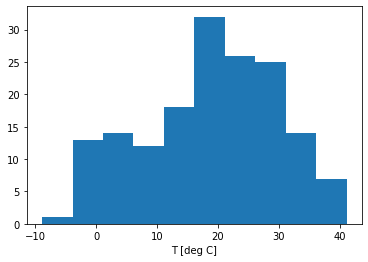

In [268]:
plt.hist((weather_yearly.max_temp - 32) * 5 / 9)
plt.xlabel("T [deg C]")
plt.show()